## Clustering
* Unsupervised Learning.
* Tries to find the natural grouping of data.
* Though there exist many quantifying measures to evaluate clustering, but it is always better to take the help of domain expert for evaluation.
* Characteristics of a good clustering algorithm are:
    1. The ability to discover some or all of the hidden clusters.
    2. Within-cluster similarity and between-cluster dissimilarity.
    3. Ability to deal with various types of attributes.
    4. Can deal with noise and outliers.
    5. Can handle high dimensionality.
    6. Scalable, Interpretable and usable.


***
##### *Difference b/w Clustering and Classification*

* To understand the difference between Classification(Supervised Learning) and Clustering(Unsupurvised Learning), Unsupervised learning doesn't have a end goal in mind. So, you don't have a Target variable that you want to predict and thus check how accurate your model is.
* Instead, you try to find what your data tells you about it's grouping.

* Try to understand the difference between 2 using this example:
    * You are at an Airport. There are various passengers siting in the waiting area.
    * A teacher asks his students, can you group the passengers into different groups. You have an open choice of what criteria for grouping you want to use.
    * Here's the grouping done by various students:
        * Student A: Based on the Gender of the passengers
        * Student B: Based on the Age of the passengers.
        * Student C: Based on whether they are with kids or not.
        * Student D: Based on what is their potential destination (He/she identified the destination based on which waiting area they are sitting, or by actually going and asking the destination of each passenger; It doesn't matter).
        * Student E: Based on the hair color of each passenger.
    
    * As you might notice, there is no fixed criteria for grouping, and none of the groupings are wrong either.

* **Same happens in clustering as well. Based on your criteria and understanding of the data by your clustering method, output groups can change.**
    

* **Now, the Teacher changed the question.**
    * He said that instead of open choice for criteria, you have to group each passenger as per their Gender.
    * Now, All 5 students will come up with same grouping. Reason, beacause they already know how to identify a male and female.
        
* **This is what happens in classification. You have a fixed criteria that you want your data to be grouped for. Firstly you learn how to identify those grouping (In our example, students learned, while they were kids, how to identify male and female. And then they worked on classifying each passenger.**

***
### Applications of Clustering:
* Clustering has innumerous applicaitons. Few are:
    1. Market/Customer Segmentation
    2. Social Network Analysis
    3. Image Segmentation.
    4. Improving the Supervised Learning Algorithms.
    5. Recommender system
    6. Anomaly Detection - Kmeans is not suited for this as it assumes clusters are of uniform shape.
    7. Gene Analysis/ Biology.
 
* Clustering can be really helpful in Pattern Discovery and Knowledge Discovery.    

## Types of Clustering.

* Each clustering algorithm works on the similar rule i.e. identiying the similarity between various data points and dissimilarity with other clusters.

* All types of clusterings try to implement the above rule only, albeit a differnt way.

* You can categorise clustering algorithms based on 2 factors:
    1. Belongingness of each data point to a cluster.
    2. Similarity Mechansim used.

#### *1. Based on Belongingness of each data point to a cluster.*
* Under this category we can have 2 broad categories of Clustering algorithms:
1. **Hard Clustering:**
    * Each Data-point belongs to 1 and only 1 cluster.
    * Eg: Most of the clustering algorithms that we have are under this category.
2. **Soft / Fuzzy Clustering:**
    * Each Data-point have some probability or likelihood for getting assigned to a cluster. i.e each data point can belong to multiple clusters with some degree.
    * Eg.: Fuzzy K-Means Clustering or most of Expectation-Maximization Algorithm.

***

#### *2. Based on Similarity Mechanism used.*
* There can be various cluster models based on this mechanism, but broadly, we have below 4:
1. **Connectivity Models:**
    * Builds model based on distance connectivity.
    * Eg: Hierarchical Clustering.
2. **Centroid Models:**
    * Compute the centroid of the data.
    * Eg: K-Means
3. **Distribution Models:**
    * clusters are modeled using some statistical distribution like, Gaussian.
    * Eg: Gaussian Mixture Model.
4. **Density Models:**
    * Clusters are defined as the areas of higher density than the remainder of the data.
    * Eg: DBSCAN and OPTICS.

**NOTE: Below WikiPedia Link has very good information about these. Please go through it once.**
        
https://en.wikipedia.org/wiki/Cluster_analysis
        


In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt

In [2]:
admissions = pd.read_csv('../admissions.csv')

# drop Serial No.
admissions.drop('Serial No.', axis=1, inplace=True)

# Add Categorical Target column
admissions.loc[admissions['Chance of Admit ']>=0.72,'Admitted']=1
admissions.loc[admissions['Chance of Admit ']<0.72,'Admitted']=0
admissions['Admitted']=admissions['Admitted'].astype(np.int64)

admissions.head()

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit,Admitted
0,337,118,4,4.5,4.5,9.65,1,0.92,1
1,324,107,4,4.0,4.5,8.87,1,0.76,1
2,316,104,3,3.0,3.5,8.00,1,0.72,1
3,322,110,3,3.5,2.5,8.67,1,0.80,1
4,314,103,2,2.0,3.0,8.21,0,0.65,0


In [3]:
X = admissions.iloc[:,:-2]
y = admissions[['Admitted']]

In [4]:
X.head()

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research
0,337,118,4,4.5,4.5,9.65,1
1,324,107,4,4.0,4.5,8.87,1
2,316,104,3,3.0,3.5,8.00,1
3,322,110,3,3.5,2.5,8.67,1
4,314,103,2,2.0,3.0,8.21,0


In [5]:
y.head()

,Admitted
0,1
1,1
2,1
3,1
4,0


In [6]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X1 = scaler.fit_transform(X)

# K-Means Clustering

* K-means clustering is an iterative, centroid or distance based algorithm that tries to minimize the distance of the points in a cluster with their centroid.


### K-means approach:
1. Choose the number of clusters, k
2. Select k random points from the data as centroids.
3. Assign all the points to their nearest centroids.
4. Re-compute the centroid. In K-means, it is the mean of all points.
5. Repeat steps 3 and 4 unless stopping criteria is met.


*  **NOTE:**
    1. K-means tries to choose the Centroid that can minimise the __inertia__.
    2. __INERTIA__ = Sum of square of distance between data points and centroid.
> min(sum[ (x$_{i}$ - u$_{j}$)$^{2}$ ])

***Stopping Criteria:***
1. Maximum number of iterations is reached.
2. There is no change in the centroids after re-computation.
3. There is no change in cluster of points i.e., They are in same clusters as before.

***Limitations/Challenges of K-Means:***
1. K-Means tries to generate clusters of equal sizes. In real world, this is not always the case. clusters can be of different sizes.
2. Mismatch of densitites in data can cause problem. K-means can group dense cluster into 1 cluster group. To overcome this, you can either increase the k, or use K-means++ to choose the cluster centroids.
3. In K-means, number of clusters, k is an input parameter. You have to specify how many clusters you want your data to be segregated into.


***Choosing the right k, number of Clusters in k-Means:***
    * While choosing the right k can be challenging, we have certain ways to choose the right k.

__1. Elbow Method:__
    1. Plot of Within-cluster sum of squares, also known as inertia with clusters k.
    2. The location of the bend (knee or elbow) is generally considered as the good indicator of number of clusters.
    3. The intention of any clustering algorithm is to minimize the inertia.

__2. Average Silhouette Method:__
    1. It is same as Elbow Method, but instead of plotting graph between number of clusters, k and Inertia, we plot it between number of clusters, k and Average Silhouette.
    2. Silhoutte value/score measures how similar a point is to its own cluster compared to other clusters.
    3. It's value is between +1 and -1 and usually indixates that points are in correct cluster.
    4. A high average silhouette width indicates a good clustering.
    5. Average silhouette method computes the average silhouette of observations for different values of k. The optimal number of clusters k is the one that maximize the average silhouette over a range of possible values for k .
    6. If too many points have negative Silhouette score, then it is an indication of either we have too many or too few  clusters.
    
__3. Cluster Dendrogram:__
    1. This is only for Hierarchical clustering.
    2. dendogram is tree like structure which shows the which data points are clubbed together in 1 cluster.

for i in range(n_init):
    choose k random centroids from data
    for j < max_iterations:
        compute the distance
        compute the new centroids
        if centroids are not changing:
            break (exit from j loop)
        elif clusters are not changing:
            break (exit from j loop)
        
            

In [9]:
from sklearn.cluster import KMeans
kmeans_model = KMeans(n_clusters = 2, init='k-means++')

# scaled X
kmeans_model.fit(X1)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=2, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [10]:
kmeans_model.cluster_centers_

array([[ 0.8195786 ,  0.77743984,  0.77558214,  0.75352613,  0.67830726,
         0.83195087,  0.67151914],
       [-0.67056431, -0.63608714, -0.63456721, -0.61652138, -0.55497867,
        -0.68068708, -0.54942475]])

In [11]:
kmeans_model.inertia_

1843.7414493671833

In [12]:
X1.shape

(500, 7)

In [13]:
kmeans_model.labels_

array([0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1,
       1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0,
       1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1,
       0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1,
       1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1,

In [14]:
len(kmeans_model.labels_)

500

In [15]:
y['Cluster'] = kmeans_model.labels_

C:\Users\ikhurana\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [16]:
y.tail(10)

,Admitted,Cluster
490,0,1
491,0,1
492,0,1
493,0,1
494,0,1
495,1,0
496,1,0
497,1,0
498,1,0
499,1,0


In [17]:
xdf = pd.DataFrame(X1, columns=X.columns)

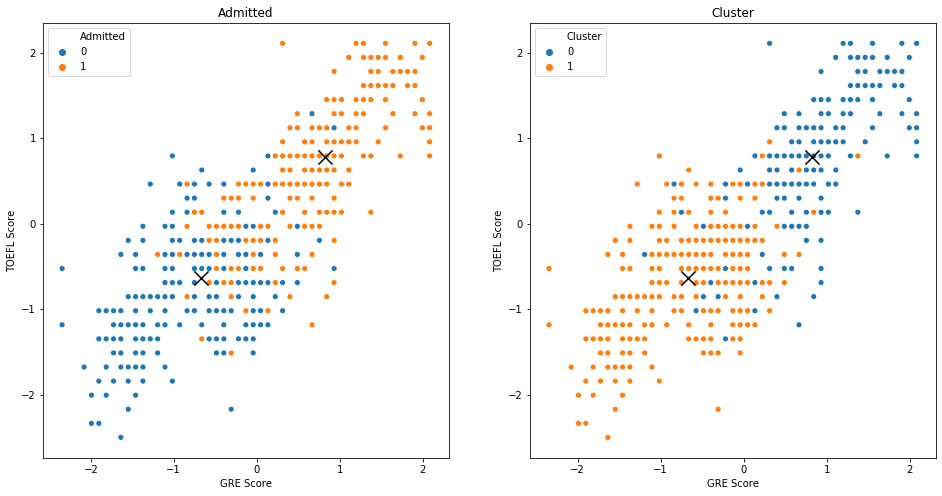

In [18]:
fig, ax = plt.subplots(1,2, figsize=(16,8))
a = sns.scatterplot(xdf['GRE Score'], xdf['TOEFL Score'], hue=y['Admitted'], ax=ax[0])
a.set_title('Admitted')
a.scatter(kmeans_model.cluster_centers_[:,0], kmeans_model.cluster_centers_[:,1], marker="x", color='black', s = 200)
b = sns.scatterplot(xdf['GRE Score'], xdf['TOEFL Score'], hue=y['Cluster'], ax=ax[1])
b.set_title('Cluster')
b.scatter(kmeans_model.cluster_centers_[:,0], kmeans_model.cluster_centers_[:,1], marker="x", color='black', s = 200)

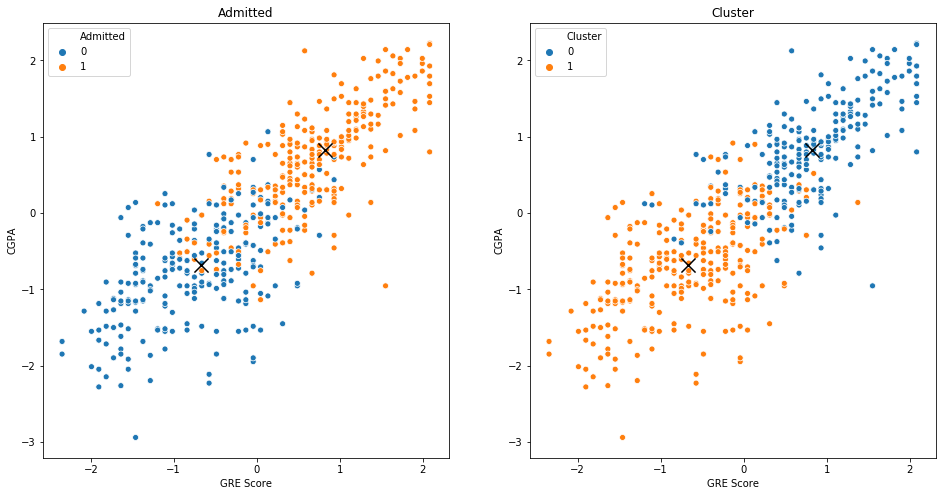

In [19]:
fig, ax = plt.subplots(1,2, figsize=(16,8))
a = sns.scatterplot(xdf['GRE Score'], xdf['CGPA'], hue=y['Admitted'], ax=ax[0])
a.set_title('Admitted')
a.scatter(kmeans_model.cluster_centers_[:,0], kmeans_model.cluster_centers_[:,5], marker="x", color='black', s = 200)
b = sns.scatterplot(xdf['GRE Score'], xdf['CGPA'], hue=y['Cluster'], ax=ax[1])
b.set_title('Cluster')
b.scatter(kmeans_model.cluster_centers_[:,0], kmeans_model.cluster_centers_[:,5], marker="x", color='black', s = 200)

In [20]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)

X_pca = pca.fit_transform(xdf)

pca_df = pd.DataFrame(data=X_pca, columns=['PC1', 'PC2'])
pca_df.head()

,PC1,PC2
0,-3.568375,-0.328318
1,-1.639199,0.034550
2,0.550991,-0.720794
3,-0.345470,-1.280237
4,2.035804,0.039366


In [21]:
kmeans_model_pca = KMeans(n_clusters = 2, init='k-means++')
kmeans_model_pca.fit(pca_df)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=2, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [22]:
y_pca = admissions[['Admitted']]

y_pca['Cluster'] = kmeans_model_pca.labels_

C:\Users\ikhurana\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


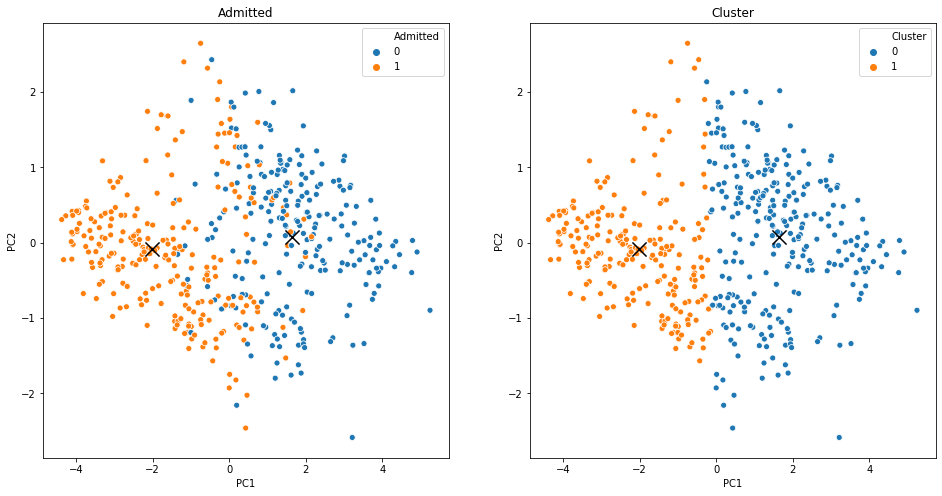

In [23]:
fig, ax = plt.subplots(1,2, figsize=(16,8))

# create scatter plot
a = sns.scatterplot(pca_df['PC1'], pca_df['PC2'], hue=y_pca['Admitted'], ax=ax[0])
a.set_title('Admitted')

# set the cluster centers
a.scatter(kmeans_model_pca.cluster_centers_[:,0], kmeans_model_pca.cluster_centers_[:,1], marker="x", color='black', s = 200)

# create scatter plot
b = sns.scatterplot(pca_df['PC1'], pca_df['PC2'], hue=y_pca['Cluster'], ax=ax[1])
b.set_title('Cluster')

# set the cluster centers
b.scatter(kmeans_model_pca.cluster_centers_[:,0], kmeans_model_pca.cluster_centers_[:,1], marker="x", color='black', s = 200)

In [24]:
from sklearn.metrics import silhouette_score

# calulate intertia for multiple k values:
def calculate_inertia(df, max_k):
    k_inertia = {}
    for k in range(1, max_k + 1):
        model = KMeans(n_clusters=k)
        model.fit(df)
        k_inertia[k] = model.inertia_
        
    return k_inertia


# calculate the silhouette score
def calculate_silhouette_score(df, max_k):
    sil_score = {}
    
    # silhouette score needs minimum 2 clusters as it is distance between clusters
    for k in range(2, max_k + 1):
        model= KMeans(n_clusters = k).fit(df)
        sil_score[k] = silhouette_score(df, model.labels_, metric = 'euclidean')
    return sil_score

In [25]:
k_inertia = calculate_inertia(pca_df, 10)
k_inertia

{1: 2734.0526249241957,
 2: 1079.103053354097,
 3: 718.1764239190047,
 4: 504.8503029737982,
 5: 398.0283389560443,
 6: 309.7350030141467,
 7: 264.3364153349112,
 8: 229.1970669898401,
 9: 204.19238280130196,
 10: 179.0306820343256}

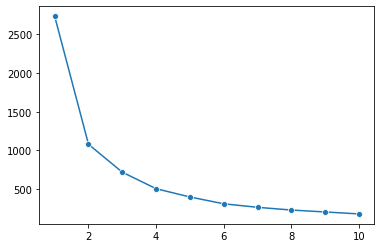

In [26]:
sns.lineplot(list(k_inertia.keys()), list(k_inertia.values()), marker='o')

In [27]:
k_sil_score = calculate_silhouette_score(pca_df, 10)
k_sil_score

{2: 0.4976904374140329,
 3: 0.41143535077744353,
 4: 0.4290298494841194,
 5: 0.42416818611132345,
 6: 0.4313141544978904,
 7: 0.4078641349972443,
 8: 0.38275176207042866,
 9: 0.4049871746811102,
 10: 0.3880198428612051}

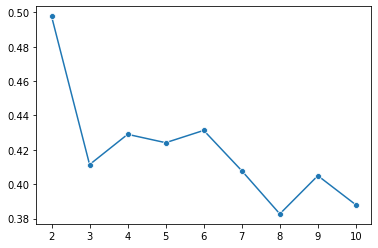

In [28]:
sns.lineplot(list(k_sil_score.keys()), list(k_sil_score.values()), marker='o')

C:\Users\ikhurana\Anaconda3\lib\site-packages\seaborn\relational.py:818: MatplotlibDeprecationWarning: Saw kwargs ['c', 'color'] which are all aliases for 'color'.  Kept value from 'color'.  Passing multiple aliases for the same property will raise a TypeError in 3.3.
  line, = ax.plot([], [], **kws)
C:\Users\ikhurana\Anaconda3\lib\site-packages\seaborn\relational.py:829: MatplotlibDeprecationWarning: Saw kwargs ['c', 'color'] which are all aliases for 'color'.  Kept value from 'color'.  Passing multiple aliases for the same property will raise a TypeError in 3.3.
  line, = ax.plot(x, y, **kws)
C:\Users\ikhurana\Anaconda3\lib\site-packages\seaborn\relational.py:818: MatplotlibDeprecationWarning: Saw kwargs ['c', 'color'] which are all aliases for 'color'.  Kept value from 'color'.  Passing multiple aliases for the same property will raise a TypeError in 3.3.
  line, = ax.plot([], [], **kws)
C:\Users\ikhurana\Anaconda3\lib\site-packages\seaborn\relational.py:829: MatplotlibDeprecationWa

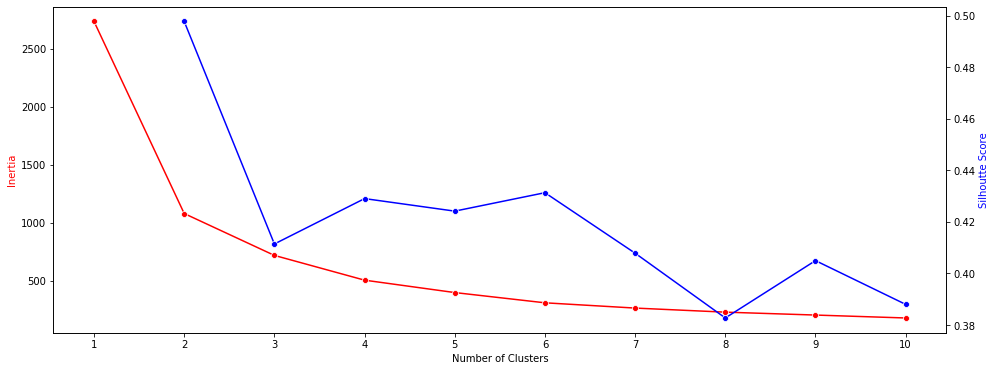

In [29]:
fig, ax = plt.subplots(1,1, figsize=(16,6))
a = sns.lineplot(list(k_inertia.keys()), list(k_inertia.values()), marker='o', ax=ax, c = 'red')
a.set_xlabel("Number of Clusters")
a.set_ylabel('Inertia', c='red')
a.set(xticks=range(1,11))

ax2 = ax.twinx()
b = sns.lineplot(list(k_sil_score.keys()), list(k_sil_score.values()), marker='o', ax=ax2, c='blue')
b.set_ylabel("Silhoutte Score", c='blue')

plt.show()

In [30]:
kmeans_model_pca2 = KMeans(n_clusters = 4  , init='k-means++')
kmeans_model_pca2.fit(pca_df)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=4, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [31]:
y_pca2 = admissions[['Admitted']]

y_pca2['Cluster'] = kmeans_model_pca2.labels_

C:\Users\ikhurana\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


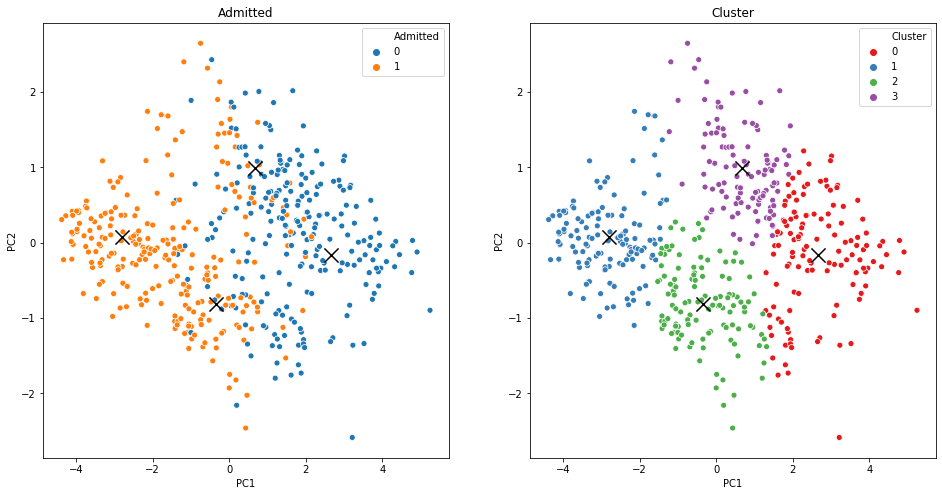

In [32]:
fig, ax = plt.subplots(1,2, figsize=(16,8))
a = sns.scatterplot(pca_df['PC1'], pca_df['PC2'], hue=y_pca2['Admitted'], ax=ax[0])
a.set_title('Admitted')
a.scatter(kmeans_model_pca2.cluster_centers_[:,0], kmeans_model_pca2.cluster_centers_[:,1], marker="x", color='black', s = 200)
b = sns.scatterplot(pca_df['PC1'], pca_df['PC2'], hue=y_pca2['Cluster'], ax=ax[1], palette=sns.color_palette('Set1',4))
b.set_title('Cluster')
b.scatter(kmeans_model_pca2.cluster_centers_[:,0], kmeans_model_pca2.cluster_centers_[:,1], marker="x", color='black', s = 200)

# Hierarchical Clustering

https://en.wikipedia.org/wiki/Hierarchical_clustering#Divisive_clustering

* Tries to build a hierarchy of clusters.
* Based on the idea that all clusters are part of 1 big cluster, the original data.
* Two types:
    1. Agglomerative:
        * Aims at "Bringing things together".
        * Bottom up approach.
        * Each observation starts in it's own cluster and we merge them based on similarity as we move up in the hierarchy.
        * It is most widely used strategy of Hierarchical Clustering.
    2. Divisive:
        * Top Down approach.
        * At start all observations are part of 1 big cluster.
        * Then we determine all the possible clusters. Exhaustive search can yeild 2^n clusters, but we usually use heuristics like K-means to trim it down.
        * Inefficient in comparison with Agglomerative.

***

### Measure of Cluster Dissimilarity:
* In order to group data points or split clusters, you need a way to compute the similarity or dissimilarity.
* In clustering, this is achieved via 2 metrics:
    1. Distance Measure
    2. Linkage Criteria


##### Distance Metric:
* Distance metric is used to determine the similarity between 2 data points.
* There exist several distance metrics:
    1. Euclidean Distance - Most commonly used.
    2. Squared Euclidean Distance
    3. Manhattan Distance
    4. Maximum Distance
    5. Mahalanobis Distance(Euclidean and Manhattan are special case of Mahalanobis Distance)
    6. Cosine Similarity - Used mostly for string and non-numeric data.
    7. Hamming Distance - Used mostly for string and non-numeric data.
    8. Levenshtein Distance - Used mostly for string and non-numeric data.

##### Linkage Criteria
* It determines the additional criteria based on which clusters should be merged.
* There exist several linkage criteria:
    1. ___Single Linkage or Minimum Linkage:___ It is the minimum distance between any 2 pair of points a and b where a belongs to cluster A and b belongs to cluster B. i.e., It finds the 2 points which are closest to each other.
    2. ___Complete Linkage or Maximum Linkage:___ It is the maximum distance between any 2 pair of points a and b where a belongs to cluster A and b belongs to cluster B. i.e., It finds teh 2 points which are farthest to each other.
    3. ___Centroid Linkage:___ a and b represent the centroids of cluster A and B respectively.
    4. ___Average Linkage:___ Choose all points, and average the distance for each pair from A and B.
    5. ___Ward's Method or Ward's Minimum Variance Method:___ It simply states that one should choose those 2 clusters to merge for which change in variance of cluster is minial. It uses Euclidean distance to prioritize the clusters.

* For Pros and cons of each  Linkage, please refer this article:

https://towardsdatascience.com/understanding-the-concept-of-hierarchical-clustering-technique-c6e8243758ec

In [33]:
from scipy.cluster.hierarchy import dendrogram, linkage

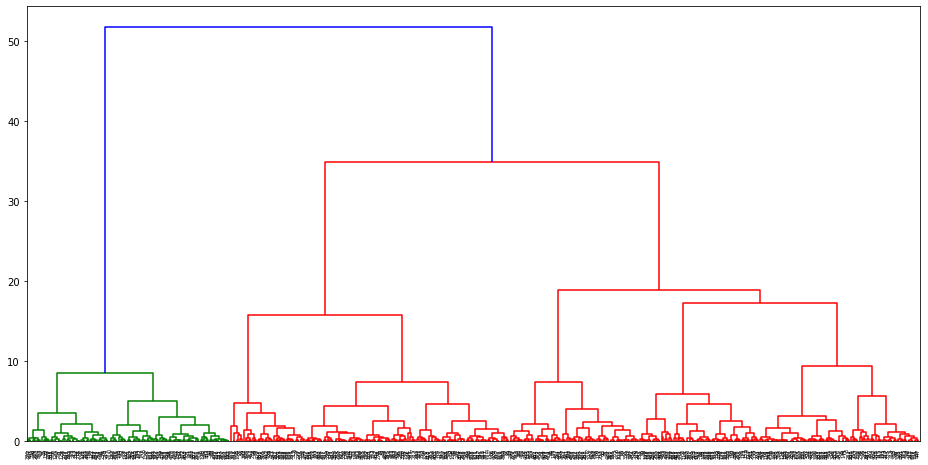

In [34]:
fig, ax = plt.subplots(1, 1, figsize=(16,8))
dtree = dendrogram(linkage(pca_df, method='ward'))

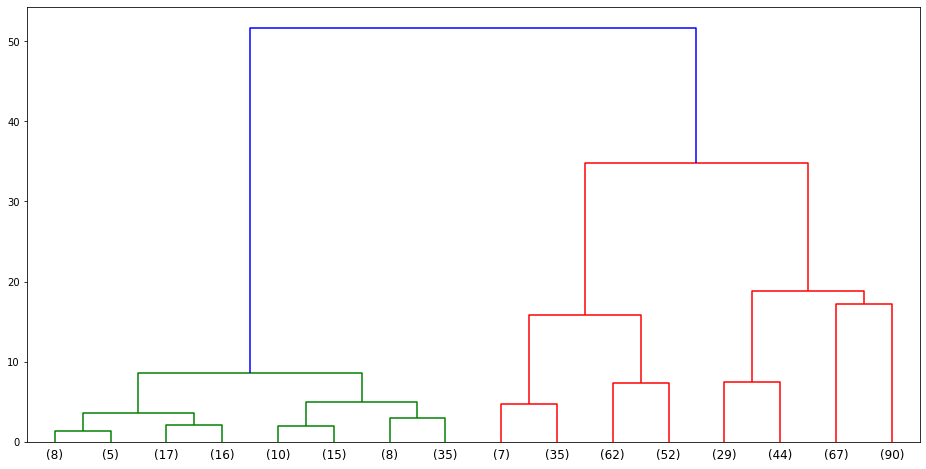

In [35]:
fig, ax = plt.subplots(1, 1, figsize=(16,8))
dtree = dendrogram(linkage(pca_df, method='ward'), p = 3, truncate_mode='level')

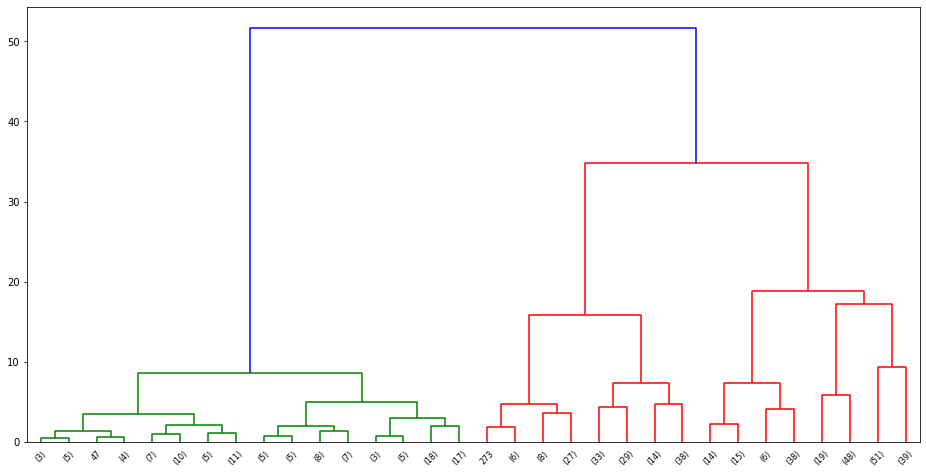

In [36]:
fig, ax = plt.subplots(1, 1, figsize=(16,8))
dtree = dendrogram(linkage(pca_df, method='ward'), p = 4, truncate_mode='level', show_leaf_counts=True)

In [37]:
from sklearn.cluster import AgglomerativeClustering
agg_model = AgglomerativeClustering(n_clusters = 2, affinity = 'euclidean', linkage = 'ward')
agg_model.fit(pca_df)

AgglomerativeClustering(affinity='euclidean', compute_full_tree='auto',
                        connectivity=None, distance_threshold=None,
                        linkage='ward', memory=None, n_clusters=2)

In [38]:
y_agg = admissions[['Admitted']]

y_agg['Cluster'] = agg_model.labels_

C:\Users\ikhurana\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


Text(0.5, 1.0, 'Cluster')

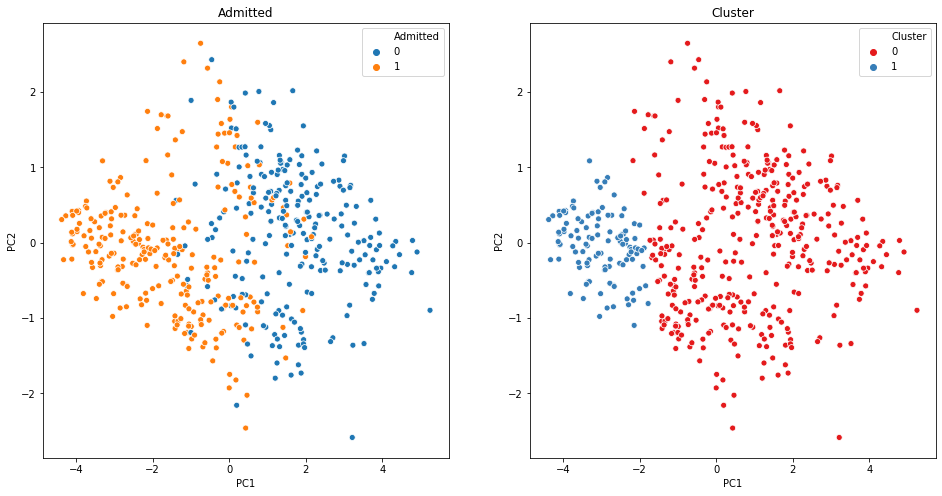

In [39]:
fig, ax = plt.subplots(1,2, figsize=(16,8))
a = sns.scatterplot(pca_df['PC1'], pca_df['PC2'], hue=y_agg['Admitted'], ax=ax[0])
a.set_title('Admitted')

b = sns.scatterplot(pca_df['PC1'], pca_df['PC2'], hue=y_agg['Cluster'], ax=ax[1], palette=sns.color_palette('Set1',agg_model.n_clusters_))
b.set_title('Cluster')

In [40]:
from sklearn.mixture import GaussianMixture

In [63]:
gmm = GaussianMixture(n_components=2, covariance_type='full')
# covariance_type: spherical, diag, tied, full
gmm.fit(pca_df)

GaussianMixture(covariance_type='full', init_params='kmeans', max_iter=100,
                means_init=None, n_components=2, n_init=1, precisions_init=None,
                random_state=None, reg_covar=1e-06, tol=0.001, verbose=0,
                verbose_interval=10, warm_start=False, weights_init=None)

In [64]:
y_gmm = admissions[['Admitted']]

y_gmm['Cluster'] = gmm.predict(pca_df)

C:\Users\ikhurana\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


Text(0.5, 1.0, 'Cluster')

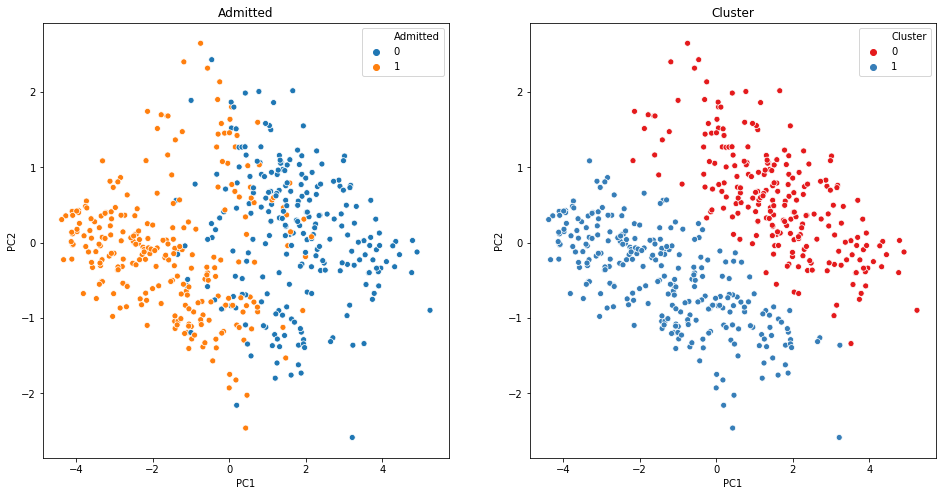

In [65]:
fig, ax = plt.subplots(1,2, figsize=(16,8))
a = sns.scatterplot(pca_df['PC1'], pca_df['PC2'], hue=y_gmm['Admitted'], ax=ax[0])
a.set_title('Admitted')

b = sns.scatterplot(pca_df['PC1'], pca_df['PC2'], hue=y_gmm['Cluster'], ax=ax[1], palette=sns.color_palette('Set1',2))
b.set_title('Cluster')

In [62]:
gmm.predict_proba(pca_df)

array([[9.99380122e-01, 6.19878253e-04],
       [9.39294752e-01, 6.07052476e-02],
       [5.08567756e-03, 9.94914322e-01],
       [1.26024082e-01, 8.73975918e-01],
       [4.81779531e-06, 9.99995182e-01],
       [9.95873010e-01, 4.12699026e-03],
       [1.30501642e-01, 8.69498358e-01],
       [8.62213289e-06, 9.99991378e-01],
       [8.03891096e-10, 9.99999999e-01],
       [2.10629188e-02, 9.78937081e-01],
       [3.03247052e-01, 6.96752948e-01],
       [9.83151520e-01, 1.68484795e-02],
       [9.89260405e-01, 1.07395952e-02],
       [1.29113360e-02, 9.87088664e-01],
       [7.11452976e-04, 9.99288547e-01],
       [3.91029775e-04, 9.99608970e-01],
       [1.67069087e-02, 9.83293091e-01],
       [3.09233966e-02, 9.69076603e-01],
       [5.64685474e-02, 9.43531453e-01],
       [8.14422628e-05, 9.99918558e-01],
       [2.81466392e-04, 9.99718534e-01],
       [3.46782864e-02, 9.65321714e-01],
       [9.99445470e-01, 5.54530122e-04],
       [9.99733514e-01, 2.66486352e-04],
       [9.991930